In [ ]:
import csv

file_path = 'spotify_2023.csv'


with open(file_path, 'r', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)

In [ ]:
import pandas as pd

file_path = 'spotify_2023.csv'

encodings = ['utf-8', 'latin-1', 'cp1252']
for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(df)
            break
        except Exception as e:
            print(f"An error occurred: {e}")

An error occurred: 'utf-8' codec can't decode bytes in position 4-5: unexpected end of data
                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone          

In [ ]:
columns_to_drop = ['key', 'instrumentalness_%']
df.drop(columns=columns_to_drop, inplace=True)
dropped_rows = df[df.isnull().any(axis=1)].copy()
df.dropna(inplace=True)

In [ ]:
#df[['numeric_column']] = scaler.fit_transform(df[['numeric_column']])
df['mode'] = df['mode'].replace({'Minor': 0, 'Major': 1})

In [ ]:
df = df[pd.to_numeric(df['streams'], errors='coerce').notna()]


In [ ]:
print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

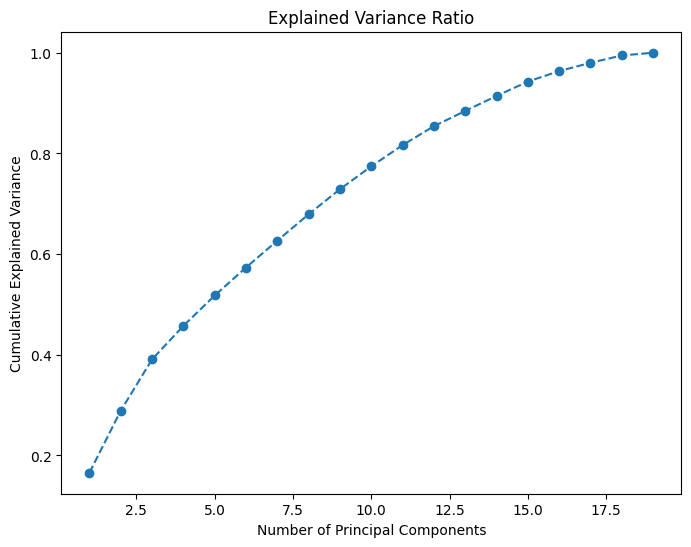

Most Informative Features:
in_apple_playlists      0.412150
in_spotify_playlists    0.403178
in_apple_charts         0.376833
in_spotify_charts       0.364667
in_deezer_playlists     0.341457
in_deezer_charts        0.327358
in_shazam_charts        0.312791
released_year           0.155129
speechiness_%           0.114978
energy_%                0.099427
acousticness_%          0.089667
released_month          0.086743
artist_count            0.051585
valence_%               0.046322
liveness_%              0.034761
mode                    0.028913
released_day            0.026281
danceability_%          0.022235
bpm                     0.015112
Name: 0, dtype: float64


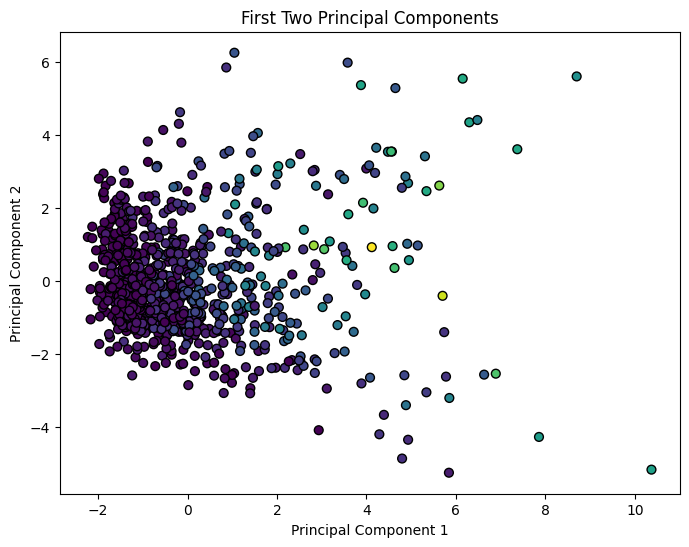

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude the 'streams' column
features = df.drop(['streams','track_name', 'artist(s)_name'], axis=1)
# Remove thousands separators and convert columns to numeric
features = features.apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce') if x.dtype == 'O' else x)
# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(normalized_features)

# Plot explained variance ratio to determine number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on the plot or a predefined value
# For example, let's choose 3 components
n_components = 18

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(normalized_features)

# Create a DataFrame to display the most informative features
feature_names = features.columns
pca_components_df = pd.DataFrame(pca.components_, columns=feature_names)

# Display the most informative features based on the first principal component
most_informative_features = pca_components_df.iloc[0].abs().sort_values(ascending=False)
print("Most Informative Features:")
print(most_informative_features)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
# Plot the first two principal components colored by 'released_year'
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=features['in_apple_playlists'], cmap='viridis', edgecolor='k', s=40)
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()